# Proyecto Final - Visualizaciones en Python

## Primera entrega

### Archivo: ProyectoDS_ParteI_Molle.ipynb
<br>

---
<br>

## 📌 **Abstract**

#### Este proyecto se basa en el análisis del dataset "Duolingo Global Language Popularity 2020-2024", disponible en Kaggle, el cual recoge información sobre los idiomas más estudiados en la plataforma Duolingo. A lo largo del período comprendido entre 2020 y 2024, la base de datos registra las preferencias lingüísticas globales, detallando, para cada país y cada año, los dos idiomas más populares y su respectiva posición en términos de aprendizaje. Este conjunto de datos ofrece una perspectiva única sobre las tendencias del aprendizaje de idiomas a nivel mundial y permite identificar patrones dentro de diversas regiones.

#### El objetivo del estudio es comprender cómo han evolucionado las preferencias lingüísticas en distintos continentes, observando qué idiomas han sido los más dominantes, cuáles han ganado terreno en popularidad y cómo ha fluctuado el interés por aprender diferentes lenguas con el paso del tiempo. A través del análisis de datos y la representación visual mediante gráficos, se busca revelar las dinámicas subyacentes en el aprendizaje de idiomas, proporcionando una visión clara y estructurada sobre los cambios y tendencias en distintos países.  

#### Sin embargo, el estudio también presenta ciertas limitaciones inherentes. Uno de los principales desafíos es el sesgo implícito en la base de usuarios de Duolingo, ya que la plataforma tiende a concentrarse en poblaciones con acceso digital, lo que podría excluir sectores de la población que tienen otras preferencias o dificultades de acceso. Asimismo, la restricción de analizar únicamente los dos idiomas más estudiados en cada país limita la profundidad del análisis, dejando fuera otras lenguas que podrían estar en crecimiento, aunque no alcancen los primeros puestos. A pesar de estas consideraciones, los hallazgos obtenidos en el análisis representan una herramienta valiosa para comprender las tendencias del aprendizaje de idiomas y su impacto en la educación global, siendo una base sólida para pronosticar la demanda de enseñanza de idiomas en los próximos años.
<br>

---
<br>

## ❓ **Preguntas / Hipótesis**

#### 1. ¿Cuál fue el idioma más popular por continente?
#### 2. ¿En cuántos países el idioma inglés logró mantener su popularidad como idioma más aprendido?
#### 3. ¿Cuál es el top 10 de idiomas con más apariciones en el puesto #1?
#### 4. ¿Cuántos países han cambiado el idioma más popular cada año?
#### 5. ¿Cuál es el top 5 de los idiomas que han pasado del puesto #2 al puesto #1 en más países?


<br>

---
<br>

## 📊 **Visualizaciones y Análisis**


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
files.download("Duolingo_Language_Ranking_Cleaned.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
df = pd.read_excel("Duolingo_Language_Ranking_Cleaned.xlsx")

print(df.head())


       Country  Year  Popularity_Ranking Language
0  Afghanistan  2020                   1  English
1  Afghanistan  2021                   1  English
2  Afghanistan  2022                   1   German
3  Afghanistan  2023                   1  English
4  Afghanistan  2024                   1  English


In [6]:
from google.colab import files
files.download("Countries by continents.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
df_continentes = pd.read_excel("Countries by continents.xlsx")

print(df_continentes.head())

  Continent       Country
0    Africa       Algeria
1    Africa        Angola
2    Africa         Benin
3    Africa      Botswana
4    Africa  Burkina-Faso


In [8]:
df_duolingo = pd.read_excel("Duolingo_Language_Ranking_Cleaned.xlsx")

df_continentes = pd.read_excel("Countries by continents.xlsx")

df_mergeado = df_duolingo.merge(df_continentes, on="Country", how="left")

print(df_mergeado.head())

       Country  Year  Popularity_Ranking Language Continent
0  Afghanistan  2020                   1  English      Asia
1  Afghanistan  2021                   1  English      Asia
2  Afghanistan  2022                   1   German      Asia
3  Afghanistan  2023                   1  English      Asia
4  Afghanistan  2024                   1  English      Asia


In [9]:
cantidad_paises = df["Country"].nunique()
print(f"El dataset tiene {cantidad_paises} países en total.")

El dataset tiene 193 países en total.


## 🗑️ **Valores perdidos**

In [10]:
missing_values = df_mergeado[["Country", "Year", "Popularity_Ranking", "Language", "Continent"]].isnull().sum()

print("Valores faltantes por columna:\n")
print(missing_values)

Valores faltantes por columna:

Country                0
Year                   0
Popularity_Ranking     0
Language               0
Continent             70
dtype: int64


In [11]:
df_missing_continent = df_mergeado[df_mergeado["Continent"].isnull()][["Country"]].drop_duplicates()

print("Países sin información de continente:\n")
print(df_missing_continent)
print(f"\nCantidad de países sin este dato: {df_missing_continent.shape[0]}")

Países sin información de continente:

                    Country
280              Cabo-Verde
400            Cote-dIvoire
450    Democratic-Rep-Congo
560                eSwatini
660           Great-Britain
980            Lichtenstein
1450  São Tomé and Príncipe

Cantidad de países sin este dato: 7


---
<br>

## 1️⃣ **¿Cuál fue el idioma más popular por continente?**

#### Este gráfico nos muestra el idioma más estudiado en cada continente, basado en la cantidad de países donde ocupó el puesto #1. La visualización permite identificar qué idioma dominó en cada zona y qué tan extendido fue su aprendizaje porque además, se presenta la proporción de países dentro de cada continente que favorecieron ese idioma.

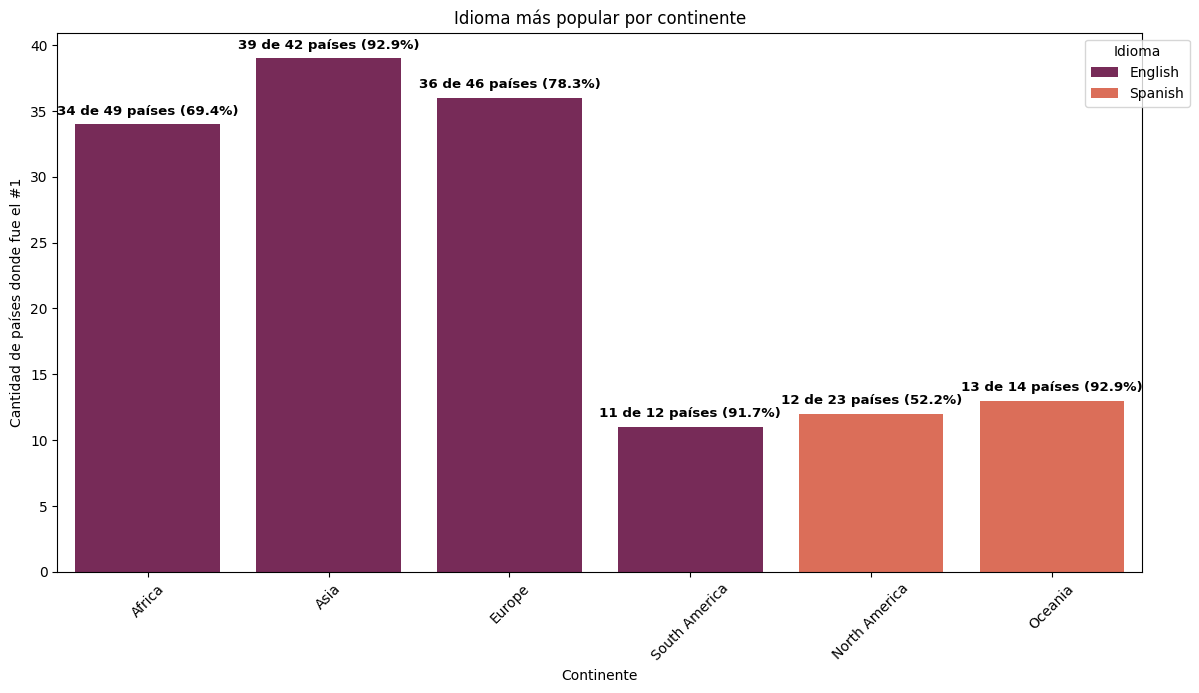

In [12]:
df_cleaned = df_mergeado.dropna()

df_top1 = df_cleaned[df_cleaned["Popularity_Ranking"] == 1]

df_continente_top1 = df_top1.groupby(["Continent", "Language"])["Country"].nunique().reset_index()

df_most_popular = df_continente_top1.loc[df_continente_top1.groupby("Continent")["Country"].idxmax()]

df_total_paises = df_cleaned.groupby("Continent")["Country"].nunique().reset_index()
df_total_paises.columns = ["Continent", "Total_Countries"]

df_most_popular = df_most_popular.merge(df_total_paises, on="Continent", how="left")

df_most_popular = df_most_popular.sort_values("Continent", key=lambda x: x.map({
    "Africa": 0, "Asia": 1, "Europe": 2, "South America": 3, "North America": 4, "Oceania": 5
}))

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=df_most_popular, x="Continent", y="Country", hue="Language", palette="rocket")

for bar, row in zip(ax.patches, df_most_popular.itertuples()):
    height = bar.get_height()
    percentage = (row.Country / row.Total_Countries) * 100

    ax.text(
        x=bar.get_x() + bar.get_width() / 2,
        y=height + 0.5,
        s=f"{row.Country} de {row.Total_Countries} países ({percentage:.1f}%)",
        ha="center", va="bottom", fontsize=9.6, fontweight="bold", color="black"
    )

plt.title("Idioma más popular por continente")
plt.xlabel("Continente")
plt.ylabel("Cantidad de países donde fue el #1")
plt.legend(title="Idioma", bbox_to_anchor=(1.05, 1), loc="best")
plt.xticks(rotation=45)
plt.show()

## 🧐 Análisis
#### Se observa una fuerte predominancia del inglés en la mayoría de los continentes. África y Europa tienen una predominancia del inglés con un porcentaje relativamente alto, mientras que Asia y Sudamérica tienen la mayor estabilidad lingüística con la gran mayoría de países estudiando inglés. En Oceanía ocurre la misma estabilidad pero con el español como el idioma más aprendido, junto a Norteamérica que por otro lado, tiene una diversidad más notoria. En conjunto, estos datos permiten comprender las diferencias en la preferencia de idiomas según el contexto cultural y educativo de cada continente. Sin embargo, se debe tener en cuenta que hay países que no se contabilizaron en este gráfico debido a valores faltantes en la información de continente, los cuales representan el 6.3% del total.
<br>
<br>

----
<br>

## 2️⃣ **¿En cuántos países el idioma inglés logró mantener su popularidad como idioma más aprendido?**

#### Este gráfico muestra la cantidad de países donde el inglés logró mantener su posición como el idioma más estudiado. Representa cuántos años consecutivos cada país mantuvo al inglés en el puesto #1, y aquellos donde el inglés nunca llegó a ser el idioma más popular.

<ipython-input-13-1896982369>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_summary, x="Cantidad de años", y="Cantidad de países", palette="viridis")


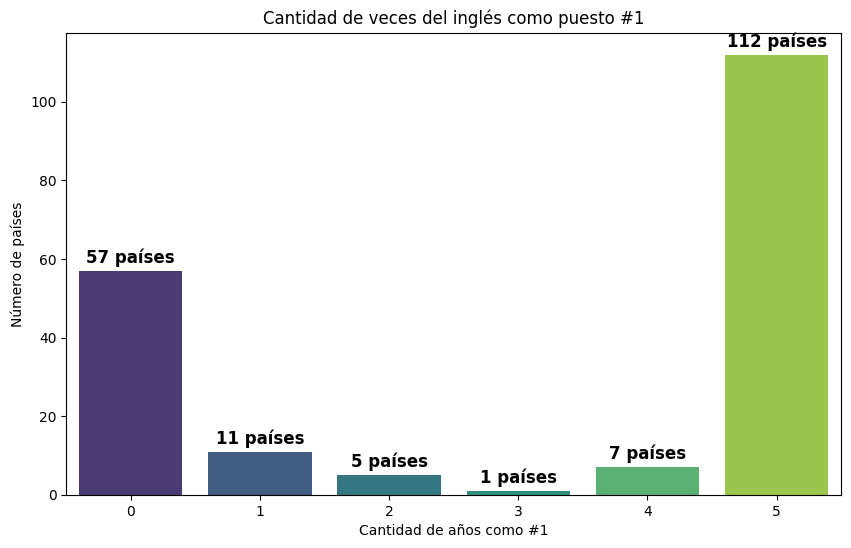

In [13]:
df_english = df[(df["Language"] == "English") & (df["Popularity_Ranking"] == 1)]

df_english_stable = df_english.groupby(["Country"])["Year"].nunique().reset_index()

df_summary = df_english_stable["Year"].value_counts().sort_index().reset_index()
df_summary.columns = ["Cantidad de años", "Cantidad de países"]

paises_totales = df["Country"].nunique()
paises_con_ingles = df_summary["Cantidad de países"].sum()
paises_sin_ingles = paises_totales - paises_con_ingles

df_summary = pd.concat([pd.DataFrame({"Cantidad de años": [0], "Cantidad de países": [paises_sin_ingles]}), df_summary], ignore_index=True)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_summary, x="Cantidad de años", y="Cantidad de países", palette="viridis")

for bar, cantidad_paises in zip(ax.patches, df_summary["Cantidad de países"]):
    height = bar.get_height()
    ax.text(
        x=bar.get_x() + bar.get_width() / 2,
        y=height + 1,
        s=f"{cantidad_paises} países",
        ha="center", va="bottom", fontsize=12, fontweight="bold", color="black"
    )

plt.title("Cantidad de veces del inglés como puesto #1")
plt.xlabel("Cantidad de años como #1")
plt.ylabel("Número de países")
plt.xticks(rotation=0)
plt.show()

## 🧐 Análisis

#### Se observa que la mayoría de los países han mantenido al inglés como el idioma más popular durante cinco años consecutivos, lo que refleja una tendencia sostenida en el aprendizaje. Sin embargo, también hay un número considerable de países donde el inglés nunca llegó a ser el idioma más estudiado, lo que evidencia diferencias culturales y lingüísticas entre regiones.  Este análisis permite entender qué tan dominante ha sido el inglés globalmente, así como los casos en los que ha sido desplazado por otros idiomas en la preferencia de los usuarios.
<br>
<br>

---
<br>

## 3️⃣ **¿Cuál es el top 10 de idiomas con más apariciones en el puesto #1?**

#### Este análisis muestra los 10 idiomas que ocuparon el puesto #1, sumando todas sus apariciones en distintos países y años. La visualización permite identificar cuáles lenguas dominaron en términos de popularidad global en Duolingo y destaca las diferencias entre idiomas en función de su frecuencia como el más estudiado.


<ipython-input-14-2379583222>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_idiomas_populares, x="Language", y="Country", palette="rainbow")


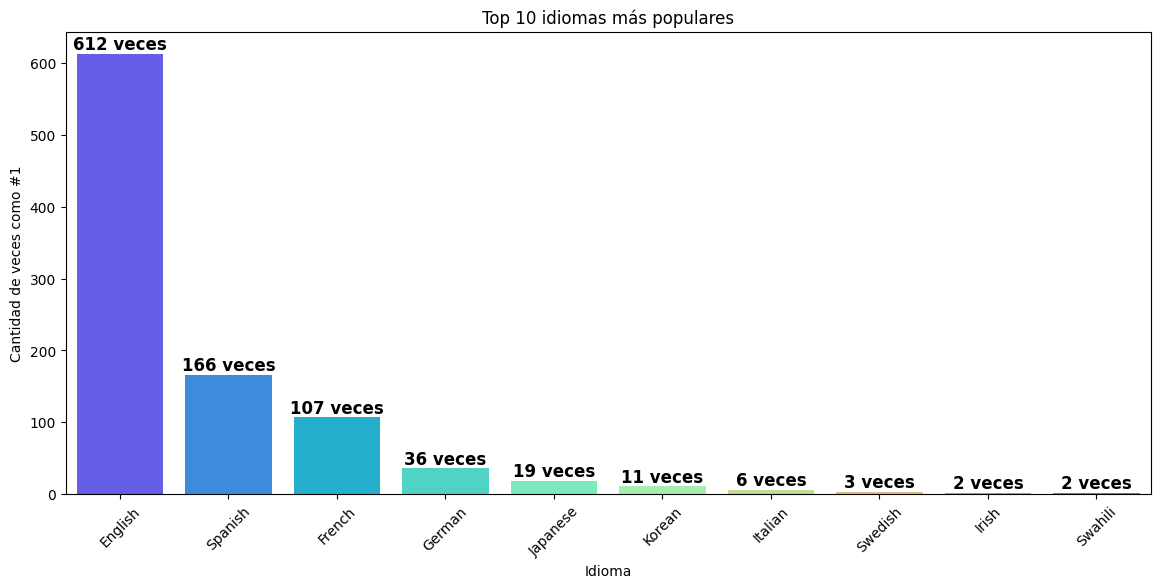

In [14]:
df_idiomas_populares = df[df["Popularity_Ranking"] == 1].groupby("Language")["Country"].count().reset_index()

df_idiomas_populares = df_idiomas_populares.sort_values(by="Country", ascending=False).head(10)

plt.figure(figsize=(14, 6))
ax = sns.barplot(data=df_idiomas_populares, x="Language", y="Country", palette="rainbow")

for bar, row in zip(ax.patches, df_idiomas_populares.itertuples()):
    height = bar.get_height()
    ax.text(
        x=bar.get_x() + bar.get_width() / 2,
        y=height + 0.5,
        s=f"{row.Country} veces",
        ha="center", va="bottom", fontsize=12, fontweight="bold", color="black"
    )

plt.title("Top 10 idiomas más populares")
plt.xlabel("Idioma")
plt.ylabel("Cantidad de veces como #1")
plt.xticks(rotation=45)
plt.show()

## 🧐 Análisis

#### Se observa una clara predominancia del inglés, que supera ampliamente al resto con 612 apariciones, seguido por el español y el francés. La diferencia entre el inglés y los demás idiomas es significativa, reflejando su estabilidad como el idioma más estudiado en la mayoría de los países. Por otro lado, idiomas como alemán, japonés y coreano lograron posicionarse en algunas regiones, aunque con una frecuencia mucho menor. Este análisis permite visualizar qué idiomas han mantenido su liderazgo en Duolingo a nivel global.
<br>
<br>

---
<br>

## 4️⃣ **¿Cuántos países han cambiado el idioma más popular cada año?**

#### Este gráfico nos permitirá visualizar la cantidad de países que han tenido variaciones en su idioma más estudiado año tras año, mostrando qué tan estable ha sido la preferencia lingüística en distintas regiones.

<ipython-input-15-361798057>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_summary, x="Cantidad de idiomas distintos como #1", y="Cantidad de países", palette="Set2")


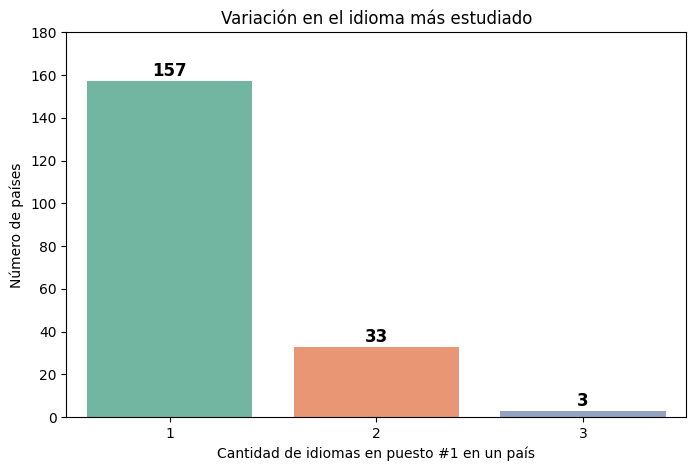

In [15]:
df_top_languages = df[df["Popularity_Ranking"] == 1]

df_changes = df_top_languages.groupby("Country")["Language"].nunique().reset_index()

df_summary = df_changes["Language"].value_counts().sort_index().reset_index()
df_summary.columns = ["Cantidad de idiomas distintos como #1", "Cantidad de países"]

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_summary, x="Cantidad de idiomas distintos como #1", y="Cantidad de países", palette="Set2")

plt.ylim(0, df_summary["Cantidad de países"].max() + 23)

for index, row in df_summary.iterrows():
    ax.text(index, row["Cantidad de países"] + 0.5, str(row["Cantidad de países"]),
            ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

plt.title("Variación en el idioma más estudiado")
plt.xlabel("Cantidad de idiomas en puesto #1 en un país")
plt.ylabel("Número de países")
plt.xticks(rotation=0)
plt.show()

## 🧐 Análisis

#### La mayoría de los países no han tenido ningún cambio en su idioma más popular, reflejando una estabilidad en las preferencias lingüísticas de los usuarios. Sin embargo, un grupo más reducido ha cambiado su idioma más estudiado dos o tres veces, lo que indica una mayor variabilidad en su aprendizaje a lo largo del tiempo. Este análisis permite visualizar qué tan dinámicas han sido las tendencias en el estudio de idiomas, mostrando la proporción de países donde la preferencia por una lengua ha sido más inestable.
<br>
<br>

---
<br>

## 5️⃣ **¿Cuáles son los idiomas que han pasado del puesto #2 al puesto #1 en más países?**

#### Este gráfico nos permitirá visualizar qué idiomas han ganado terreno en distintos países y han desplazado al anterior idioma líder. Nos permite identificar qué idiomas han tenido el mayor crecimiento en popularidad.

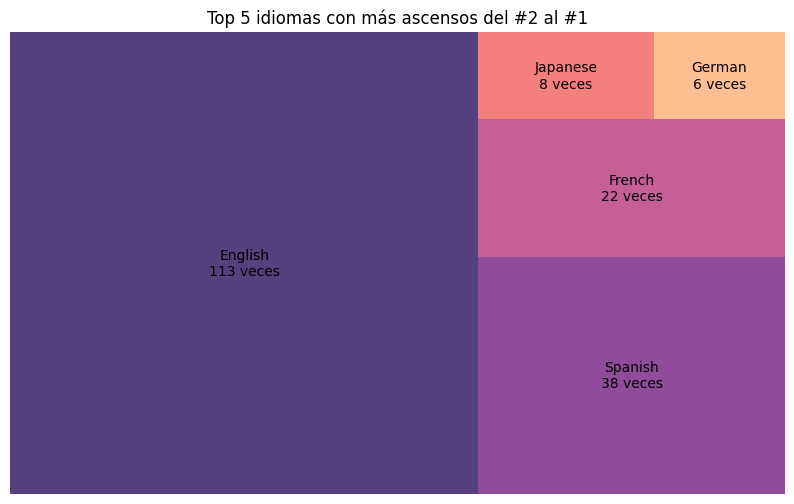

In [16]:
!pip install squarify
import squarify

df_sorted = df.sort_values(["Country", "Language", "Year"])

df_sorted["Cambio_Posicion"] = (df_sorted["Popularity_Ranking"].shift(1) == 2) & (df_sorted["Popularity_Ranking"] == 1)

df_cambios = df_sorted[df_sorted["Cambio_Posicion"]]

df_cambios_final = df_cambios["Language"].value_counts().reset_index()
df_cambios_final.columns = ["Language", "Veces subió del puesto 2 al 1"]

df_cambios_final = df_cambios_final.head(5)

plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=df_cambios_final["Veces subió del puesto 2 al 1"],
    label=[f"{lang}\n{count} veces" for lang, count in zip(df_cambios_final["Language"], df_cambios_final["Veces subió del puesto 2 al 1"])],
    color=sns.color_palette("magma", len(df_cambios_final)),
    alpha=0.8
)
plt.title("Top 5 idiomas con más ascensos del #2 al #1")
plt.axis("off")
plt.show()

## 🧐 Análisis

#### El inglés encabeza la lista con 113 ascensos, seguido por el español y el francés con 38 y 22 respectivamente.  Este análisis permite identificar qué idiomas han ganado popularidad con el tiempo, reflejando un crecimiento en la preferencia de los usuarios de Duolingo. Mientras algunos idiomas han mantenido una posición estable, otros han logrado desplazar al idioma dominante en distintos países, evidenciando cambios en el aprendizaje global.
<br>

---